<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [4]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline

**1. Загрузить датасет**

In [5]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Отсутствующих значений нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

<BarContainer object of 2 artists>

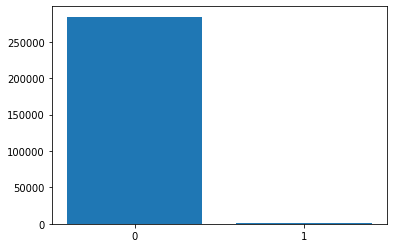

In [37]:
plt.bar(['0', '1'], [data.Class.value_counts()[0], data.Class.value_counts()[1]])

In [24]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
data.Class.value_counts()[0]

284315

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [32]:
# сумма корректных операций

data[data['Class'] == 0]['Amount'].sum()

25102462.04

In [33]:
# сумма операций мошенничества

data[data['Class'] == 1]['Amount'].sum()

60127.97

(array([410.,  40.,  17.,  14.,   2.,   2.,   4.,   1.,   1.,   1.]),
 array([   0.   ,  212.587,  425.174,  637.761,  850.348, 1062.935,
        1275.522, 1488.109, 1700.696, 1913.283, 2125.87 ]),
 <a list of 10 Patch objects>)

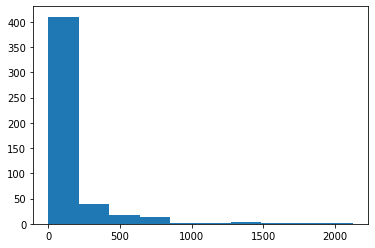

In [44]:
plt.hist(data.loc[data['Class'] == 1]['Amount'])

(array([2.78006e+05, 4.47700e+03, 1.07600e+03, 3.44000e+02, 1.76000e+02,
        9.80000e+01, 6.00000e+01, 2.60000e+01, 1.60000e+01, 6.00000e+00,
        9.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,   642.279,  1284.558,  1926.837,  2569.116,  3211.395,
         3853.674,  4495.953,  5138.232,  5780.511,  6422.79 ,  7065.069,
         7707.348,  8349.627,  8991.906,  9634.185, 10276.464, 10918.743,
        11561.022, 12203.301, 12845.58 , 13487.859, 14130.138, 14772.417,
        15414.696, 16056.975, 16699.254, 17341.533, 17983.812, 18626.091,
        19268.37 , 19910.649, 20552.928, 211

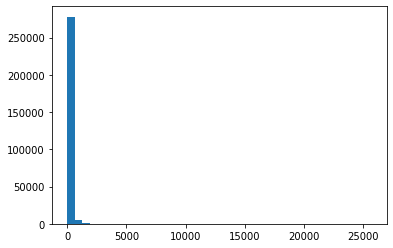

In [59]:
plt.hist(data.loc[data['Class'] == 0]['Amount'], 40)

**5. Построить графики histograms для всех значений**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288C8496B70>,
      dtype=object)

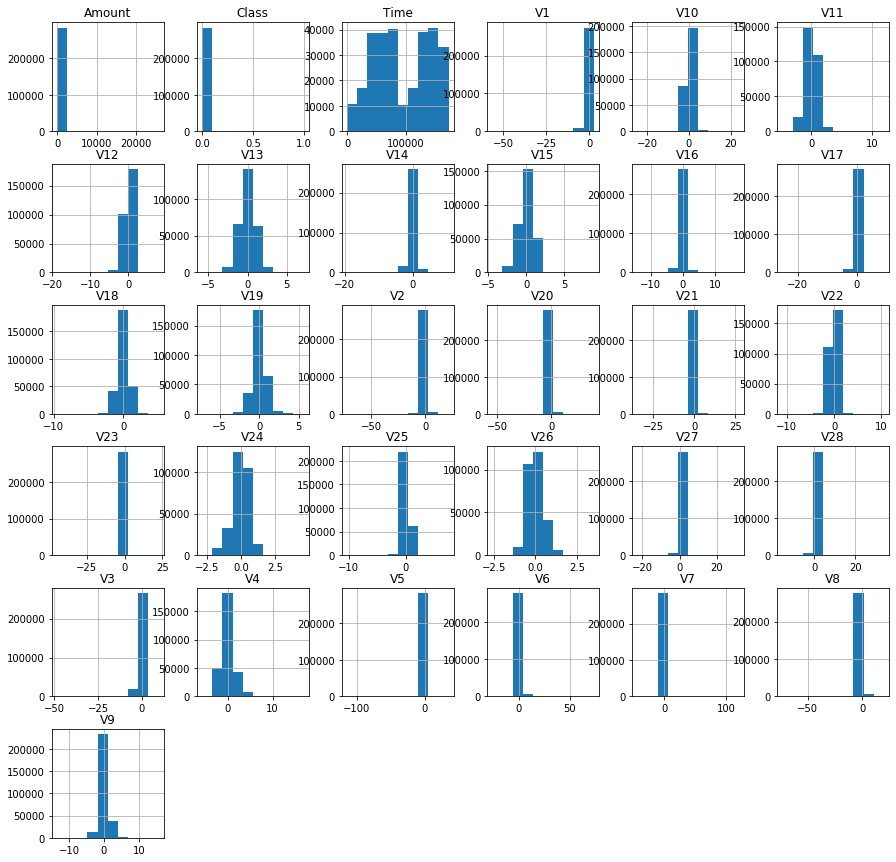

In [37]:
data.hist(figsize=(15,15))

**6. Построить матрицу корреляций для всех значений**

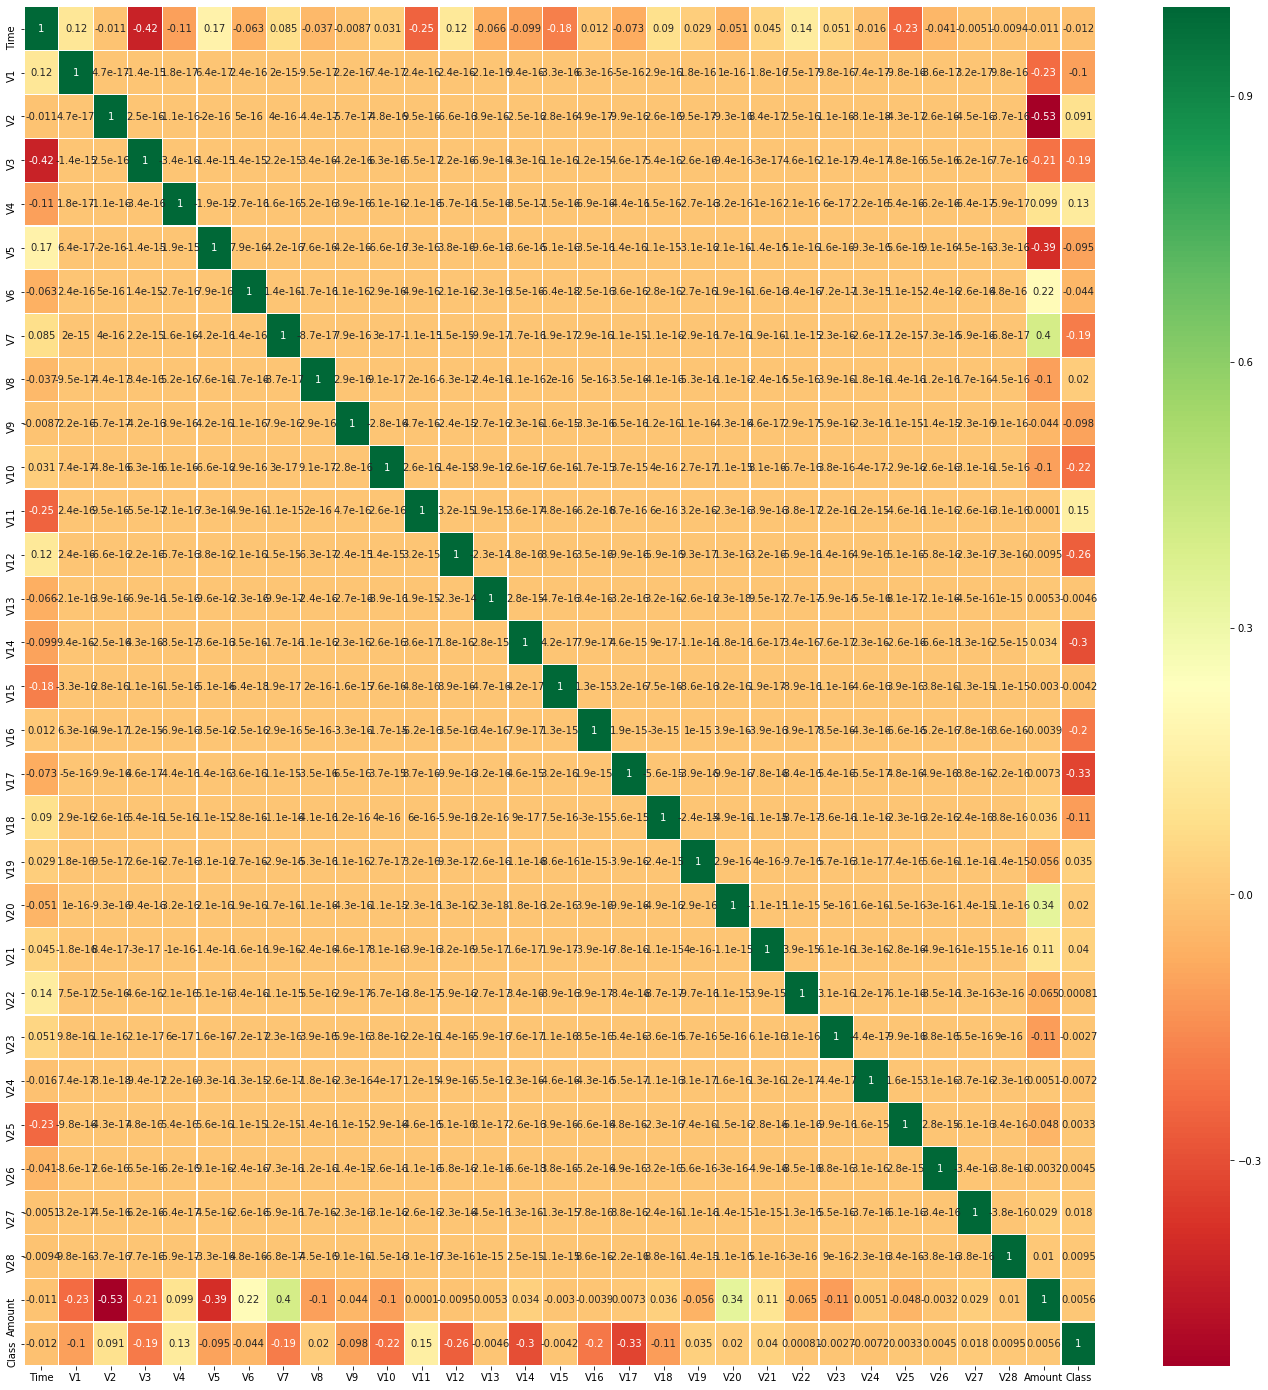

In [29]:
fig=plt.gcf()
fig.set_size_inches(24,25)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [6]:
# пишем логичтическую регрессию

# разделил данные на все без Class и отдельно выделил Class

X = data.drop('Class', axis=1)
y = data.Class

In [7]:
# подключил модуль для разделения данных на тестовые и тренировочные

from sklearn.model_selection import train_test_split

In [8]:
# создал для х и у тренировочные и тестовые значения

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [9]:
# вызвал модуль логистической регрессии

from sklearn.linear_model import LogisticRegression

In [10]:
# создал модель

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [11]:
# делаю оценку модели 
    
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.66      0.74        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
# делаю второй варинт, с нормализацией данных

# при нормализации, наименование столбцов затрется, поэтому сохряняю их в отдельную переменную

columns = list(data.columns.values)

In [13]:
# делаем нормализацию данных

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [14]:
# возвращаю наименование столбцов, после нормализации

data_norm.columns = columns

In [15]:
# строим логистическую регрессию на нормализованных данных

# выделяем переменную для предсказания

X_norm = data_norm.drop('Class', axis=1)
y_norm = data_norm.Class

In [16]:
# создаем тренировочные и тестовые данные

from sklearn.model_selection import train_test_split

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=57)

In [17]:
# создаем модель

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(X_train_norm, y_train_norm)

In [18]:
# делаю оценку модели 
    
from sklearn.metrics import classification_report

model_pred_norm = model.predict(X_test_norm)

print(classification_report(y_test_norm, model_pred_norm))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56870
         1.0       0.92      0.62      0.74        92

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Качество обсобо не поменялось. Значение F1 осталось прежним. precision стал лечше, значение recall ухудшилось

**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [26]:
# создаем модель RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 77 деревьев в качестве параметра
model_forest = RandomForestClassifier(n_estimators=77)

# обучаем модель
model_forest.fit(X_train_norm, y_train_norm)

model_pred_forest = model_forest.predict(X_test_norm)

print(classification_report(y_test_norm, model_pred_forest))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56870
         1.0       0.96      0.79      0.87        92

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [19]:
# Увеличим количество тренировочных данных

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_norm, y_train_norm)
X_resampled, y_resampled = ros.fit_sample(X_train_norm, y_train_norm)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454890


In [20]:
# создаем модель на дополненных данных

model_resampled = LogisticRegression(solver='liblinear').fit(X_resampled, y_resampled)

In [22]:
# делаю оценку модели 

model_pred_resampled = model_resampled.predict(X_test_norm)

print(classification_report(y_test_norm, model_pred_resampled))

              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99     56870
         1.0       0.07      0.89      0.12        92

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



random forest получилась самой точной моделью

# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес